## App Interface A/B test [mini project]

###### The task:
1. Test how images aspect ratio (square or rectangular) in the app influence customers;
2. Test how the new design of a button in the app influence customers conversion into order.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

#### Task 1

Test how images aspect ratio (square or rectangular) in the app influence customers.

**Importing dataset from a zipped csv-file in the working directory**

In [2]:
df_1 = pd.read_csv('5_task_1.zip', compression='zip')

df_1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


**Checking column names**

In [26]:
df_1.columns

Index(['id', 'group', 'events'], dtype='object')

**Columns description:**
* id – clients id
* group – (A – image 16:9, B – square 1:1, C – image 12:4)
* events – cumulative number of orders  

**Checking missing values and columns datatypes**

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30000 non-null  int64 
 1   group   30000 non-null  object
 2   events  30000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 703.2+ KB


**Checking duplicates in clients ids**

In [5]:
df_1.duplicated(subset=['id']).sum()

0

**Checking test groups' variences equality (Levene's test)**

In [7]:
alpha = 0.05
result = st.levene(df_1[df_1['group'] == 'A'].events,
                   df_1[df_1['group'] == 'B'].events,
                   df_1[df_1['group'] == 'C'].events)

print(f'p-value: {result.pvalue}')
if result.pvalue >= alpha:
    print('All input samples are from populations with equal variances.')
else:
    print('There are significant deviations.')

p-value: 0.1041327199523974
All input samples are from populations with equal variances.


**Checking test groups' for normality (normal distribution) with Shapiro-Wilk test**

In [8]:
group_names = ['A', 'B', 'C']
alpha = 0.05

for name in group_names:
    result = st.shapiro(df_1.query('group == @name').events.sample(1000, random_state=17))  # random_state=17 -- for stabilty of the test
    if result[1] >= alpha:
        print(f'Group {name}: the data is drawn from a normal distribution.')
    else:
        print(f'Group {name}: the data is NOT from a normal distribution.')

Group A: the data is drawn from a normal distribution.
Group B: the data is drawn from a normal distribution.
Group C: the data is drawn from a normal distribution.


**Determine whether there is any statistically significant difference between tested groups (one-way ANOVA)**

In [28]:
result = st.f_oneway(df_1[df_1['group'] == 'A'].events,
                   df_1[df_1['group'] == 'B'].events,
                   df_1[df_1['group'] == 'C'].events)

print(f'The computed F-value of the test: {round(result[0], 0)};\nThe associated p-value {result[1]}.')

if result.pvalue > 0.05:
    print('The Null hypothesis is true. There is no statistically significant difference between the groups.')
else:
    print('Rejecting the Null hypothesis. Have to look for a discrepant group.')

The computed F-value of the test: 2886.0;
The associated p-value 0.0.
Rejecting the Null hypothesis. Have to look for a discrepant group.


**Performing Tukey's test to find statistically significant difference between groups**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------
Figure(720x432)


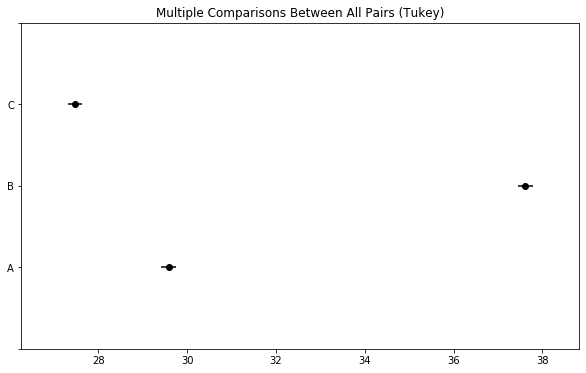

In [10]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

MultiComp = MultiComparison(df_1.events, df_1.group)
print(MultiComp.tukeyhsd().summary())
print(MultiComp.tukeyhsd().plot_simultaneous())

**Summary:**
* There is a statistically significant difference between all three groups.
* The biggest possitive influence on customers actions have group B (square images 1:1)
* We have to change images design in our app to square images.

#### Task 2

Test how the new design of a button in the app influence customers conversion into order.

**Importing dataset from a zipped csv-file in the working directory**

In [12]:
df_2 = pd.read_csv('5_task_2.zip', compression='zip')

df_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


**Checking column names**

In [31]:
df_2.columns

Index(['id', 'group', 'segment', 'events', 'combination'], dtype='object')

**Columns description:**
* id – clients id
* segment – segment (high/low)
* group – button type (control – old design, test – new design)
* events – cumulative number of orders 

**Checking missing values and columns datatypes**

In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  int64  
 1   group    100000 non-null  object 
 2   segment  100000 non-null  object 
 3   events   100000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB


**Checking duplicates in the dataframe**

In [15]:
df_2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

**Checking data splitting into groups**

In [16]:
df_2.group.value_counts()

control    50000
test       50000
Name: group, dtype: int64

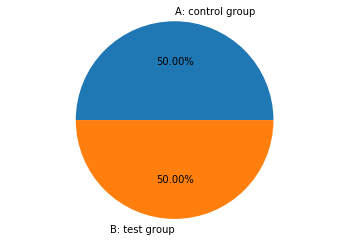

In [32]:
# grouping by group
ab_counts = df_2.groupby('group').count().reset_index()

# plotting two groups
plt.pie(ab_counts.id, labels=['A: control group', 'B: test group'], autopct='%0.2f%%')
plt.axis('equal');

In [17]:
df_2.segment.value_counts()

low     80000
high    20000
Name: segment, dtype: int64

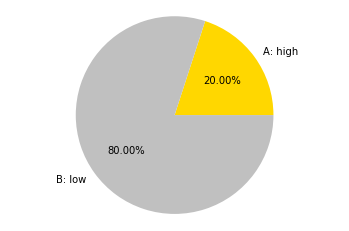

In [37]:
# grouping by segment
ab_counts = df_2.groupby('segment').count().reset_index()

# plotting two groups
plt.pie(ab_counts.id, labels=['A: high', 'B: low'], autopct='%0.2f%%', colors=['#FFD700', '#C0C0C0'])
plt.axis('equal');

**Plotting distributions for test and control groups**

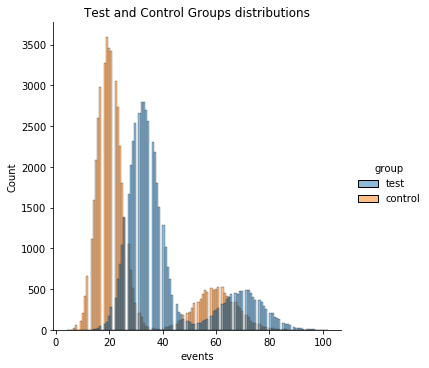

In [40]:
# plotting the data
sns.displot(data=df_2, x='events', hue='group');

# setting title
plt.title('Test and Control Groups distributions');

**Calculating median, mean and standard deviation for groups and segments**

In [19]:
df_2.groupby(['group', 'segment']) \
    .agg({'events': ['mean', 'median', 'std']})

events                 
                      mean median       std
group   segment                            
control high     59.970800   60.0  7.805347
        low      20.031575   20.0  4.473576
test    high     69.938500   70.0  8.403974
        low      33.025925   33.0  5.720845

**An analysis of variance table for one or more linear model fits (multivariate analysis of variance)**

In [21]:
formula = 'df_2.events ~ df_2.segment + df_2.group + df_2.segment:df_2.group'
model = ols(formula, df_2).fit()
aov_table = anova_lm(model, typ=2)  # typ=2 sums-of-squares model for unbalanced designs

print(aov_table)

                               sum_sq       df              F         PR(>F)
df_2.segment             2.362480e+07      1.0  689756.377485   0.000000e+00
df_2.group               3.837195e+06      1.0  112031.864119   0.000000e+00
df_2.segment:df_2.group  3.664244e+04      1.0    1069.823273  2.060261e-233
Residual                 3.424956e+06  99996.0            NaN            NaN


The influence of such factors as: group, segment and factors interaction are statistically significant (p_value (PR(>F)) < 0,05).

**Performing Tukey's test to find statistically significant difference between groups**

In [22]:
# creating a column with combinations of factors
df_2['combination'] = df_2['group'] + ' \ ' + df_2['segment']

df_2

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high
...,...,...,...,...,...
99995,60695,control,low,15.0,control \ low
99996,5934,control,low,16.0,control \ low
99997,30046,control,low,22.0,control \ low
99998,26474,control,low,21.0,control \ low


        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392 0.001 -40.1073 -39.7711   True
control \ high   test \ high   9.9677 0.001   9.7551  10.1803   True
control \ high    test \ low -26.9449 0.001  -27.113 -26.7768   True
 control \ low   test \ high  49.9069 0.001  49.7388   50.075   True
 control \ low    test \ low  12.9944 0.001   12.888  13.1007   True
   test \ high    test \ low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------
Figure(720x432)


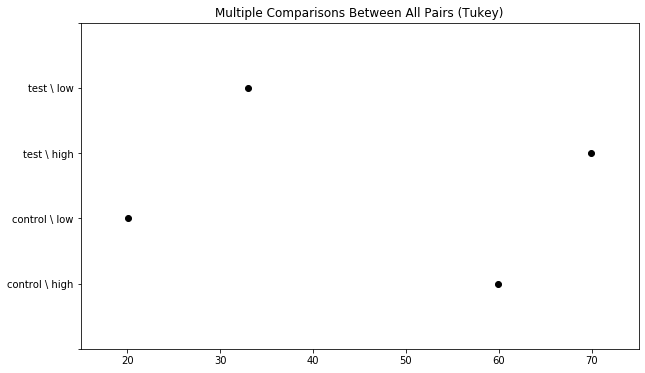

In [23]:
# Performing Tukey's test
MultiComp = MultiComparison(df_2.events, df_2.combination)
print(MultiComp.tukeyhsd().summary())
print(MultiComp.tukeyhsd().plot_simultaneous())

**Visualizing test results**

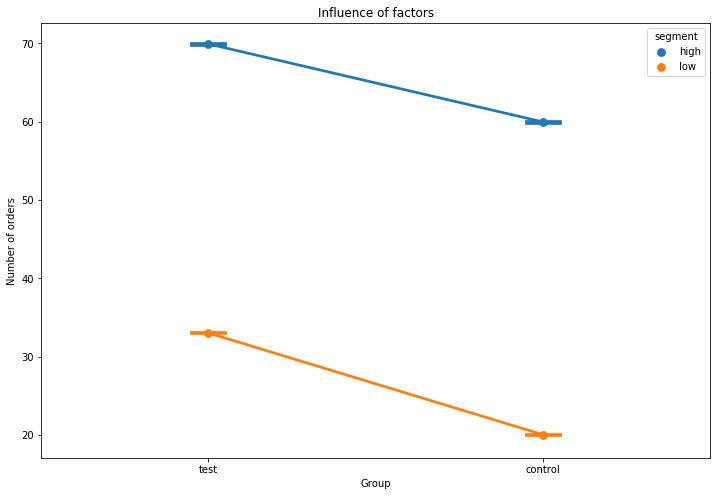

In [43]:
# setting figure size
plt.figure(figsize=(12, 8))
# plotting data
sns.pointplot(x='group', y='events', hue='segment', data=df_2, capsize=.1)

# labels and title
plt.title('Influence of factors');
plt.xlabel('Group')
plt.ylabel('Number of orders');

**Summary:**
* The group factor is statistically significant 
* The group factor is statistically significant 
* Factors interaction is statistically significant 
* An average number of orders have increased for all segments in the test group
* It is recommended to update order button design